In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import *
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
# get the data from .csv
path_advertising = 'data/Advertising.csv'
df = pd.read_csv(path_advertising)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# create a def to return the parameters
def coefficients(df, x, y):
    x1 = pd.DataFrame({

        'b0': np.ones(df.shape[0]),
        'b1': df[x]
    })
    y1 = df[y]
    model = sm.OLS(y1, x1)
    result = model.fit()
    return summarize(result)

coefficients(df, 'TV', 'sales')

,coef,std err,t,P>|t|
b0,7.0326,0.458,15.360,0.0
b1,0.0475,0.003,17.668,0.0


In [4]:
ols = coefficients(df, 'TV', 'sales')
df['predicted'] = ols['coef'].iloc[0] + ols['coef'].iloc[1] * df['TV']
df['predicted']

0      17.96235
1       9.14635
2       7.84960
3      14.22885
4      15.62060
         ...   
195     8.84710
196    11.50710
197    15.44010
198    20.50360
199    18.05735
Name: predicted, Length: 200, dtype: float64

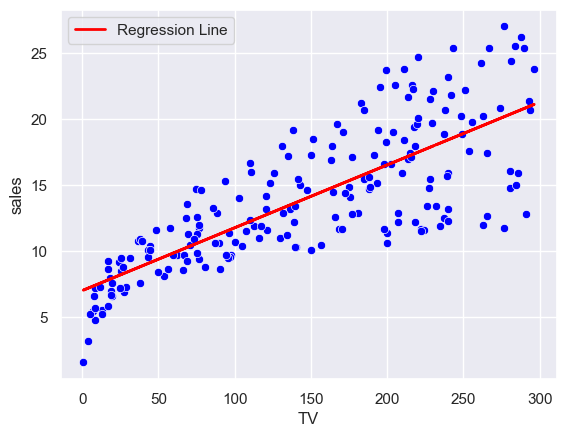

In [5]:
# Plotting results with seaborn:

sns.set_theme(style='darkgrid')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.scatterplot(data=df, x='TV', y='sales', color='blue')
ax.plot(df['TV'], df['predicted'], color='red', linewidth=2, label='Regression Line')

ax.legend()
plt.show()